In [26]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot

In [11]:
data = pd.read_csv("train.csv")
data.head()
data.shape
data.loc[:,["GrLivArea","YearBuilt","SalePrice"]]

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


[Problem 1] Scratch implementation of blending

Linear regression

<function matplotlib.pyplot.show(close=None, block=None)>

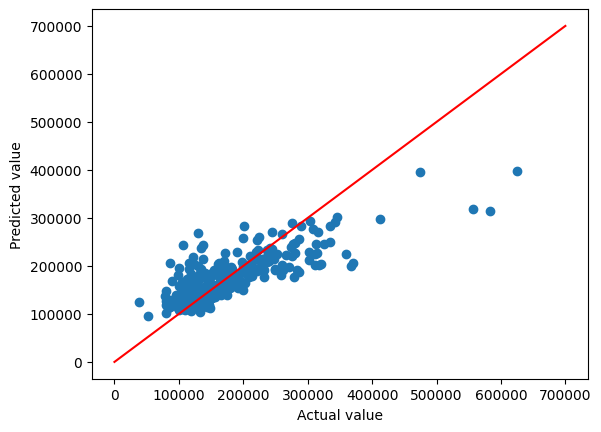

In [12]:
from sklearn.model_selection import train_test_split
x = data.loc[:,["GrLivArea"]]
y = data.loc[:,["SalePrice"]]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=123) #random state-ene randomor random hiihed yg l ene randomoor ajillana. Tuhain uyd sanamsargui uussen tuluviig hadgalah 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predicted_value = lr.predict(x_test)

import matplotlib.pyplot as plt

plt.scatter(y_test, predicted_value)
linex = range(700000)

plt.plot(linex,linex,color="red")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_value)

2553792703.6931477

Support vector machine

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show(close=None, block=None)>

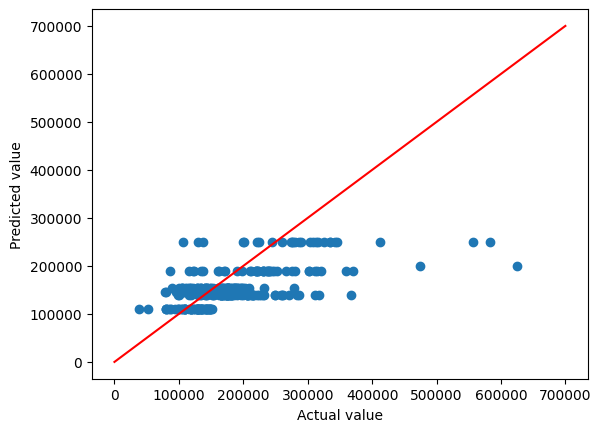

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
pred_SVM = clf.predict(x_test)

import matplotlib.pyplot as plt

plt.scatter(y_test, pred_SVM)
linex = range(700000)

plt.plot(linex,linex,color="red")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_SVM)

4606863189.44863

Decision tree

<function matplotlib.pyplot.show(close=None, block=None)>

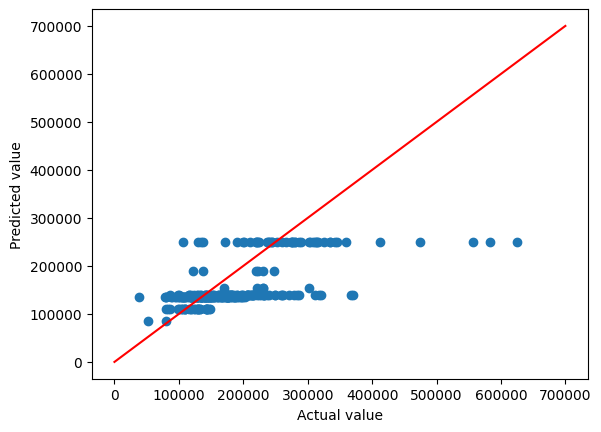

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train, y_train)
pred_DT = tree.predict(x_test)

import matplotlib.pyplot as plt

plt.scatter(y_test, pred_DT)
linex = range(700000)

plt.plot(linex,linex,color="red")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_DT)

4480033668.900685

MSE comparison
Linear regression - 2553792703.6931477
SVM - 4606863189.44863
Decision tree - 4480033668.900685
Minimum MSE algorithm is Linear regression

In [18]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('SVM', clf), ('DT', tree)], voting='hard')
eclf1 = eclf1.fit(x, y)
print(eclf1.predict(x))
np.array_equal(eclf1.named_estimators_.SVM.predict(x),eclf1.named_estimators_['SVM'].predict(x))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[140000 140000 175000 ... 250000 140000 140000]


True

[Problem 2] Scratch implementation of bagging

In [25]:
clf1 = DecisionTreeClassifier()
clf2 = LogisticRegression(multi_class='multinomial', random_state=1)
clf3 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf = VotingClassifier(estimators=[ ('dtc', clf1), ('lgr', clf2), ('rfc', clf3)], voting='soft', verbose=True)

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=123, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

eclf = eclf.fit(x_train, y_train)
y_pred = eclf.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
acc = accuracy_score(y_train,y_pred)

print('mean squared error is {}'.format(mse))
print('accuracy score: {}'.format(acc))
print(f"Estimators: {len(eclf.estimators_)}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[Voting] ...................... (1 of 3) Processing dtc, total=   0.0s
[Voting] ...................... (2 of 3) Processing lgr, total=   2.7s
[Voting] ...................... (3 of 3) Processing rfc, total=   4.0s
mean squared error is 1487177799.3330479
accuracy score: 0.6404109589041096
Estimators: 3


[Problem 3] Scratch implementation of stacking. Show at least one example that implements stacking from scratch and improves accuracy over a single model .

Null values of the data is 
GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


>svm 0.019 (0.001)
>dtc 0.011 (0.003)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

>rfc 0.010 (0.003)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


>stacking 0.000 (0.000)


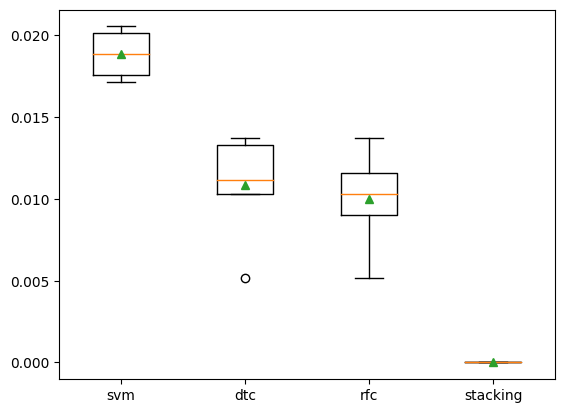

In [29]:
data = pd.read_csv('train.csv')
data = data.loc[:,['GrLivArea','YearBuilt','SalePrice']]
print("Null values of the data is \n{}".format(data.isnull().sum()))

X = data.loc[:,['GrLivArea','YearBuilt']].to_numpy()
y = data.loc[:,['SalePrice']].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=123, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('svm', SVC()))
    level0.append(('dtc', DecisionTreeClassifier()))
    level0.append(('rfc',RandomForestClassifier(n_estimators=50, random_state=1)))
    # define meta learner model
    level1 = LogisticRegression(multi_class='multinomial', random_state=1)
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model
# get a list of models to evaluate
def get_models():
    models = dict()
    models['svm'] = SVC()
    models['dtc'] = DecisionTreeClassifier()
    models['rfc'] = RandomForestClassifier(n_estimators=50, random_state=1)
    models['stacking'] = get_stacking()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()